# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import seaborn as sns

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

# pandas display - set the maximum number of columns
pd.set_option("display.max_columns", None)
# set the maximum number of rows
pd.set_option("display.max_rows", 200)
#import the data
data = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
#we don't want to overwrite the original data frame
same_data = data.copy()
same_data
#by default it will display the first 5 and the last 5 rows
#from what it shows, we have 4612  rows and 15  columns
#let's inspect the data that we have

data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
# we can also use data.shape to see the number pf rows and columns
#the first number shows rows, and the second one columns (4612 rows and 15 columns)
data.shape

(4612, 15)

In [6]:
# checking for missing values and the data types that we have
data.info()
#mostly strings are treated as object variables
# we have 4612 rows, which shows that there are no missing values
# Our data type shows that we have : 
# 1 float ( page_views_per_visit)
# 4 int types
# and 10 string types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [7]:
#verify if there are any duplicates
data.duplicated()
# our dataset shows  no duplicates as it shows False

0       False
1       False
2       False
3       False
4       False
        ...  
4607    False
4608    False
4609    False
4610    False
4611    False
Length: 4612, dtype: bool

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [8]:
#let's look at the descriptive statistics for out continuous data set
# pandas treats integers and floats as continuous variables- hence it will shows us 5 values which are integers and floats
data.describe().T
#this will show us the minumum,maximum,quartile,median,std
#AGE
# On average our leads are aged 46. The minimum age is 18 and the highest age is 63

#WEBSITE VISITS- how many times a customer(lead) visIted the website:
# on average the customer visited the website about 4 times.
#  The lowest time is 0 and the maximum time a lead has visitd the website is 30 times

#TIME SPENT ON WEBSITE - 
# The average total time spend on the website by a customer is 724. 
# ************The data does not specify if this is minutes or hours
# The lowest time spent on the website is 0 and the highest total time spent is 2537

#PAGE VIEW PER VISIT - Average number of pages on the website viewed during the visits
# On average a customer views 3 pages during a visit.
#  The least viewed number of pages is 0 meaning that the lead sometimes opens the site but does not view any page
# The most viewed number of pages is 18

# STATUS -  Flag indicating whether the lead was converted to a paid customer or not
# On average, a lead converting to a customer has been very low, 0 and the maximum has been 1 client
#this means leads that convert to buying customers are very few

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [9]:
#create a list of categorial columns in our dataset. Went to see by each column
cat_col = [ 'current_occupation', 'first_interaction','profile_completed', 'website_visits','time_spent_on_website','page_views_per_visit','last_activity', 'status']
 # how many unqie values to we have and whats the unique count/frequency
for column in cat_col:
 print(data[column].value_counts(1))
 print('-'*50)

age
57    0.083478
58    0.082827
56    0.071552
59    0.071119
60    0.051605
55    0.043365
32    0.040763
53    0.019731
24    0.019514
43    0.019297
48    0.019081
51    0.019081
54    0.019081
49    0.018864
21    0.018647
50    0.018430
46    0.018430
23    0.018430
45    0.018213
42    0.017997
19    0.017563
44    0.017563
47    0.017346
52    0.016696
33    0.016479
20    0.016262
34    0.016045
22    0.015395
41    0.015178
18    0.014310
35    0.014310
40    0.013660
37    0.013010
38    0.012576
36    0.012576
39    0.011275
62    0.010408
63    0.010191
30    0.009540
61    0.008239
31    0.008239
29    0.007806
28    0.005854
25    0.003686
26    0.003252
27    0.003036
Name: proportion, dtype: float64
--------------------------------------------------
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mob

<Axes: xlabel='status', ylabel='current_occupation'>

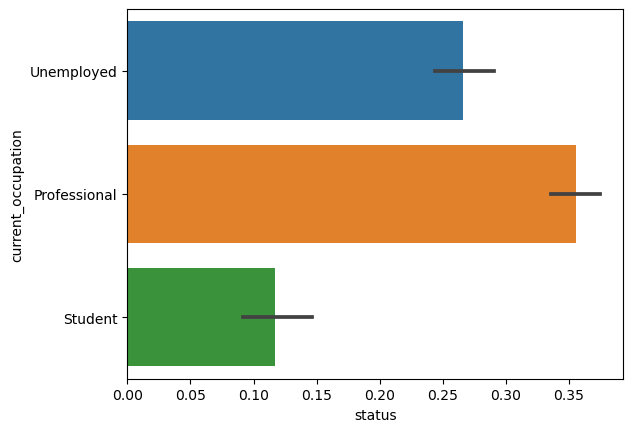

In [10]:
# let's look at some of the categorial variables
# How does current  affect lead status
sns.barplot(x = "status", y = "current_occupation", data=data)
# Professionals seem to eventually convert to a paying lead, whilst student don't buy much, probably because they cannot afford
# the unemployed also turn to buying customers probably because they have nothing to do hence they have all th etime to learn

<Axes: xlabel='status', ylabel='first_interaction'>

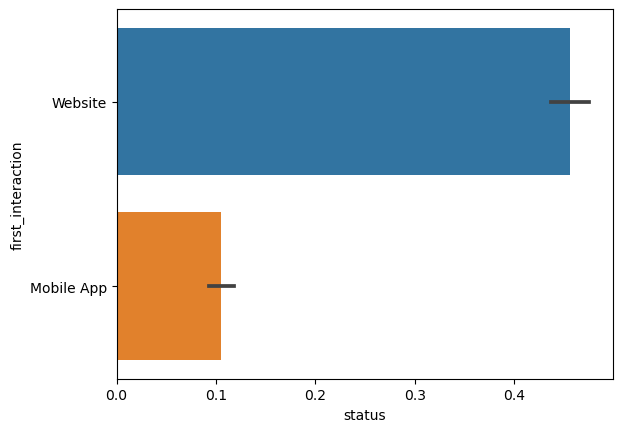

In [11]:
# Do the first channels of interaction have an impact on the lead status?
sns.barplot(x = "status", y = "first_interaction", data=data)
# Those whose fist interaction is the website are most likely to buy than those using mobile app
# On average the person who is likel to buy first interacted with the website
# There is a significance difference that shows between the two


In [ ]:
data.corr()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations